In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the excel file and call it xls_file
xls_file = pd.ExcelFile('SA_res.xlsx')
xls_file

In [3]:
df = xls_file.parse('Sheet1')
df

,Youngs Modulus,Poissons ratio,Lamination Density,Fracture Offset,DFN Azimuth,DFN Intensity (P32),DFN Length,Minimum Horizontal stress,Vertical constrast of minimum horizontal stress,Horizontal stress Anisotropy (Shmax / Shmin),Surface area
0,-1,-1,-1,-1,-1,-1,-1,-1,1,1,119732.000000
1,1,-1,-1,-1,1,-1,1,1,-1,-1,272157.000000
2,-1,1,-1,-1,1,1,-1,1,-1,-1,323160.000000
3,1,1,-1,-1,-1,1,1,-1,1,1,246015.000000
4,-1,-1,1,-1,1,1,1,-1,-1,1,212977.000000
5,1,-1,1,-1,-1,1,-1,1,1,-1,354895.000000
6,-1,1,1,-1,-1,-1,1,1,1,-1,338687.000000
7,1,1,1,-1,1,-1,-1,-1,-1,1,251424.000000
8,-1,-1,-1,1,-1,1,1,1,-1,1,199085.000000
9,1,-1,-1,1,1,1,-1,-1,1,-1,163219.000000


In [4]:
sums = pd.DataFrame()
for col in df.columns[:-1]:
    
    mid1 = df.loc[df[col] == 1, 'Surface area'].sum()
    mid2 = df.loc[df[col] == -1, 'Surface area'].sum()
    
    sums[col]= mid1 / df.loc[df[col] == 1.0, col].count(),  mid2 / df.loc[df[col] == -1.0, col].count()

    
sums.insert(0,'Value',[1,-1])
sums = sums.set_index('Value')
sums


,Youngs Modulus,Poissons ratio,Lamination Density,Fracture Offset,DFN Azimuth,DFN Intensity (P32),DFN Length,Minimum Horizontal stress,Vertical constrast of minimum horizontal stress,Horizontal stress Anisotropy (Shmax / Shmin)
Value,,,,,,,,,,
1,227517.875000,246760.000000,245411.762695,193552.512695,205435.137695,241667.500000,233482.375000,230252.887695,205386.512695,172909.012695
-1,230915.512695,211673.387695,213021.625000,264880.875000,252998.250000,216765.887695,224951.012695,228180.500000,253046.875000,285524.375000


[-1, 285524.375] [1, 172909.0126953125]
[-1, 1] [285524.375, 172909.0126953125]


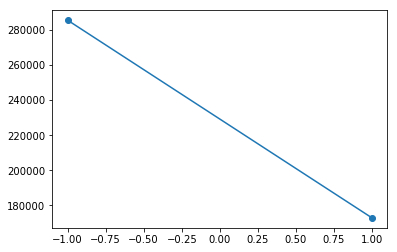

In [17]:
x1, y1 = ([-1,(sums.loc[-1,col])], [1,sums.loc[1,col]])
plt.plot([-1,1], [[[(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1],(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1]], marker = 'o')

print([[-1,(sums.loc[-1,col])][0],[-1,(sums.loc[-1,col])][1]], [[1,(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1]])

print([-1,1], [[[(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1],(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1]])
plt.show()


In [223]:
import numpy as np
mylist = []

for i in range(0,2):
    for j in range(0,5):
        mylist.append([j,i])
mylist


plt.close()

f, axarr = plt.subplots(5, 2, figsize=(8,10))

t = 0
for col in sums:
    print([-1,(sums.loc[-1,col])][0], [1,sums.loc[1,col]])
    

    
    axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1], [[[(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1],(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1]], marker = 'o')
    axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col)
    
    
    t+=1
    
for (m,n), subplot in np.ndenumerate(axarr):
    subplot.set_xlim(-1.1,1.1)
    subplot.set_ylim(172000,285524)

#plt.tight_layout()
plt.show()
#plt.savefig('mean-plot.png')

-1 [1, 227517.875]
-1 [1, 246760.0]
-1 [1, 245411.7626953125]
-1 [1, 193552.5126953125]
-1 [1, 205435.1376953125]
-1 [1, 241667.5]
-1 [1, 233482.375]
-1 [1, 230252.8876953125]
-1 [1, 205386.5126953125]
-1 [1, 172909.0126953125]


In [68]:
mylist = []

for i in range(0,2):
    for j in range(0,5):
        mylist.append([i,j])
mylist

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4]]

In [5]:
# Import the excel file and call it xls_file
xls_file = pd.ExcelFile('SA_res-all4.xlsx')
xls_file

In [6]:
df2 = xls_file.parse('Sheet1')
df3 = df2.transpose()
df3 = df3.reset_index()
combo = pd.concat([df.iloc[:,:10],df3],axis=1)

In [7]:
combo

,Youngs Modulus,Poissons ratio,Lamination Density,Fracture Offset,DFN Azimuth,DFN Intensity (P32),DFN Length,Minimum Horizontal stress,Vertical constrast of minimum horizontal stress,Horizontal stress Anisotropy (Shmax / Shmin),...,Fracture surface area propped (m2),Fracture length - Fracture 1 (m),Fracture length - Fracture 2 (m),Fracture length - Fracture 3 (m),Fracture length - Fracture 4 (m),Fracture height max - Fracture 1 (m),Fracture height max - Fracture 2 (m),Fracture height max - Fracture 3 (m),Fracture height max - Fracture 4 (m),Total fracture volume (m3)
0,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-66.803919,-50.036485,-14.629762,28.285518,-30.036576,2.987709,-8.971652,-21.606821,-33.098712,39.448749
1,1,-1,-1,-1,1,-1,1,1,-1,-1,...,60.695636,40.336491,50.454708,41.884478,4.437942,-0.474829,16.821742,-25.011291,-14.071890,-14.573860
2,-1,1,-1,-1,1,1,-1,1,-1,-1,...,85.256800,9.351155,20.185833,116.496981,0.510454,-55.314067,-53.857266,-64.301090,-62.752061,-38.394002
3,1,1,-1,-1,-1,1,1,-1,1,1,...,-1.521137,-39.438225,226.528621,55.226041,66.226759,-7.374207,-15.170017,-25.400418,-22.627120,0.368904
4,-1,-1,1,-1,1,1,1,-1,-1,1,...,-75.199758,-12.146809,-62.436387,-7.712754,-58.448892,46.510144,0.565903,79.002155,44.458197,39.139555
5,1,-1,1,-1,-1,1,-1,1,1,-1,...,12.303438,18.414294,-69.543321,-4.107911,2.389004,-16.610027,-53.356628,-48.355285,-30.215442,-30.023025
6,-1,1,1,-1,-1,-1,1,1,1,-1,...,66.464092,70.955136,50.091841,-85.392613,73.370299,-56.916592,-40.983492,-59.592334,-62.793339,-26.811896
7,1,1,1,-1,1,-1,-1,-1,-1,1,...,-65.509617,-48.948396,-16.058253,31.391223,-18.919555,46.327932,59.550436,53.389745,57.940542,-0.307875
8,-1,-1,-1,1,-1,1,1,1,-1,1,...,-7.157974,-50.737091,36.202789,-8.848549,-7.019084,43.063139,51.811945,25.255579,7.762642,26.313508
9,1,-1,-1,1,1,1,-1,-1,1,-1,...,-27.673094,-1.829186,-21.751557,-51.985197,-21.646750,-14.886520,50.210974,21.898841,12.134589,12.936983


In [8]:
# create lists of columns
params = []
measures = []

#for -1 and +1 limits
data_low = {}
data_high = {}

#collect column names 
for col in combo:
    if (combo.columns.get_loc(col) <10):
        params.append(col)
    elif (combo.columns.get_loc(col) >=11):
        measures.append(col)

for c2 in params:
    data_low[c2] = []
    data_high[c2] = []
    
    for c in measures:
        
        #calculate means for highs and lows
        data_low[c2].append((combo.loc[combo[c2] == -1, c].sum()) / combo.loc[combo[c2] == -1, c].count())
        data_high[c2].append((combo.loc[combo[c2] == 1, c].sum()) / combo.loc[combo[c2] == 1, c].count())



meanDF_low = pd.DataFrame(data_low,columns=params)
meanDF_high = pd.DataFrame(data_high,columns=params)


meanDF_high.insert(0,'Measures',measures)
meanDF_low.insert(0,'Measures',measures)

meanDF_high



,Measures,Youngs Modulus,Poissons ratio,Lamination Density,Fracture Offset,DFN Azimuth,DFN Intensity (P32),DFN Length,Minimum Horizontal stress,Vertical constrast of minimum horizontal stress,Horizontal stress Anisotropy (Shmax / Shmin)
0,Fracture height average - Fracture 1 (m),2.391379,-12.171244,-2.692838,-3.299603,2.482923,-10.478890,-7.397675,8.943067,-18.079917,59.856751
1,Fracture height average - Fracture 2 (m),16.298253,-2.891259,-7.097810,1.219945,-4.926234,-25.841641,-9.220411,-7.438901,-33.858198,35.530724
2,Fracture height average - Fracture 3 (m),15.227520,-8.457971,7.256900,-5.140721,6.557733,-16.482133,2.959085,-29.704757,-15.115352,17.376726
3,Fracture height average - Fracture 4 (m),4.498891,-4.471206,0.052124,-10.600962,-1.178653,-4.252683,-4.131829,-4.297155,-26.212300,56.832997
4,Fracture surface area total (m2),-0.741141,7.653590,7.065397,-15.559155,-10.375141,5.431893,1.860982,0.452059,-10.396355,-24.565262
5,Fracture surface area propped (m2),-3.860180,13.988248,-3.185285,-1.960692,-21.759726,3.817269,5.474481,7.027820,-21.109799,-47.191479
6,Fracture length - Fracture 1 (m),-8.606171,7.729346,2.170089,1.439105,3.430980,-10.182925,18.188033,-5.614318,4.843765,-41.817692
7,Fracture length - Fracture 2 (m),10.442752,23.576455,-24.652530,-23.074160,-17.876062,17.102497,17.821057,5.771743,7.161623,16.048638
8,Fracture length - Fracture 3 (m),0.928651,10.253128,-17.193069,-22.008870,7.425059,13.360840,-21.273832,11.215745,-16.081053,16.004381
9,Fracture length - Fracture 4 (m),-1.522721,12.045495,-7.438848,-4.941179,-13.445506,-11.231318,15.074901,-3.313748,9.600686,-18.549494


In [26]:
t = []
for i in range(0,len(data_high[key])):
    tl=[]
    for key in data_high:
        if len(data_high[key]):
            tl.append((data_high[key][i]))
    t.append(tl)

avg2=[]
for item in t:
    avg2.append(np.mean(item))
avg2

NameError: name 'key' is not defined

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


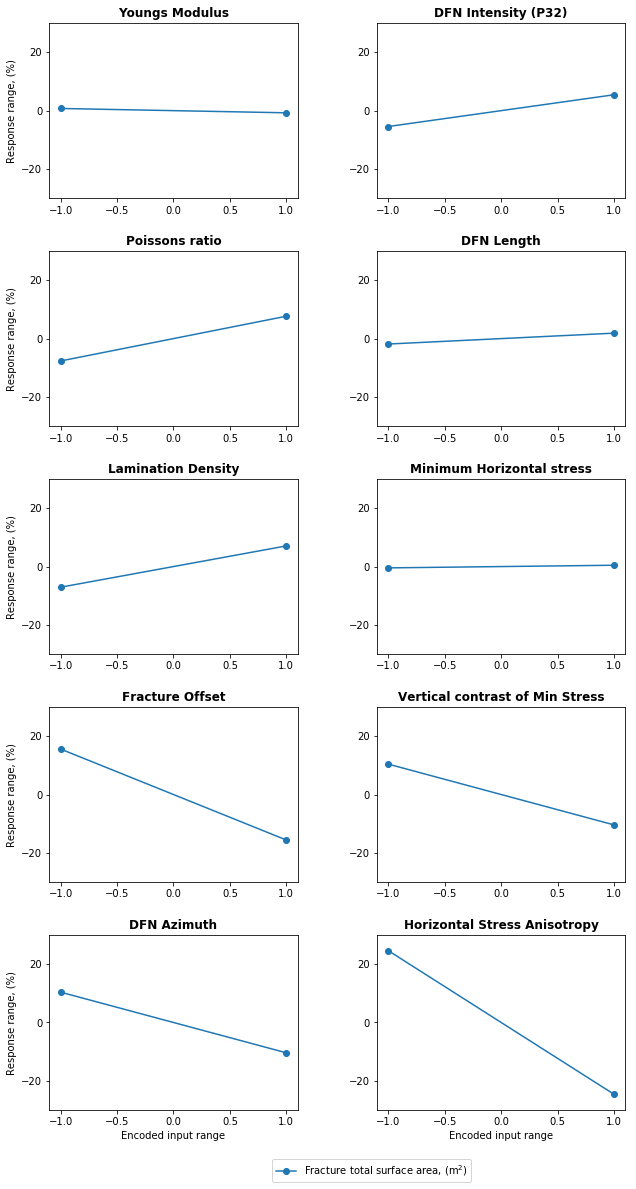

In [73]:

mylist = []
rows=[4]

for i in range(0,2):
    for j in range(0,5):
        mylist.append([j,i])
mylist

#get namee of chosen rows
names = meanDF_high['Measures'].tolist()

plt.close()

f, axarr = plt.subplots(5, 2, figsize=(10,20))

t = 0
# loop over charts of properties
for col in sums: 
    
    #for a given chart, plot the lines for outputs
    for output in rows:
        axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col][output], meanDF_high[col][output]] , marker = 'o', label="Fracture total surface area, (m$^2$)")
        axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col, weight='bold')
        
    
    t+=1
 
    for (m,n), subplot in np.ndenumerate(axarr):
        subplot.set_xlim(-1.1,1.1)
        subplot.set_ylim(-30,30)
        if (n==0):
            #subplot.set_xlabel('Variable range')
            subplot.set_ylabel('Response range, (%)')
        if (m==4):
            subplot.set_xlabel('Encoded input range')
        if (m==4 and n==1):
            subplot.legend(bbox_to_anchor=(0.4, -0.25))
            subplot.set_title('Horizontal Stress Anisotropy',weight='bold')
        if (m==3 and n==1):
            subplot.set_title('Vertical contrast of Min Stress',weight='bold')
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title|
#plt.tight_layout()

f.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.32, hspace=0.30)


#plt.legend(loc='best')
plt.show()
#plt.savefig('mean-plot-area-r.pdf',dpi=500)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


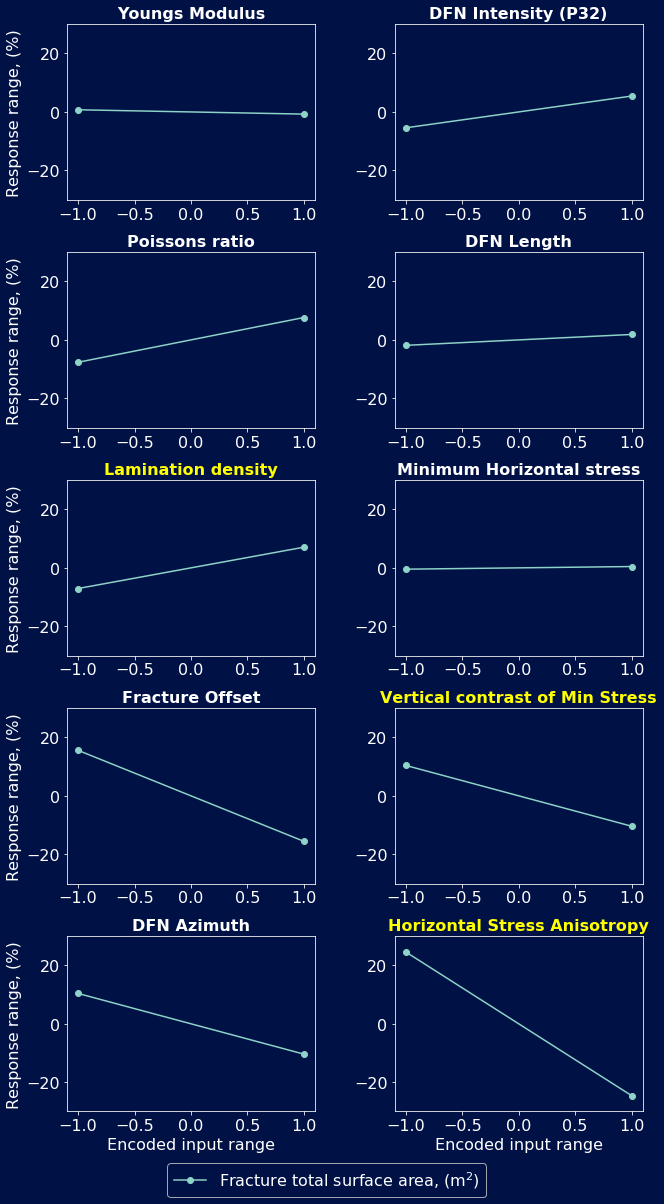

In [37]:
# as above but with dark colors


bg_color='#001146'

mylist = []
rows=[4]

for i in range(0,2):
    for j in range(0,5):
        mylist.append([j,i])
mylist

#get namee of chosen rows
names = meanDF_high['Measures'].tolist()

plt.close()

f, axarr = plt.subplots(5, 2, figsize=(10,20),facecolor=bg_color)

t = 0
# loop over charts of properties
for col in sums: 
    
    #for a given chart, plot the lines for outputs
    for output in rows:
        axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col][output], meanDF_high[col][output]] , marker = 'o', label="Fracture total surface area, (m$^2$)")
        axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col, weight='bold')
        
    
    t+=1
 
    for (m,n), subplot in np.ndenumerate(axarr):
        subplot.set_xlim(-1.1,1.1)
        subplot.set_ylim(-30,30)
        subplot.set_axis_bgcolor(bg_color)
        if (n==0):
            #subplot.set_xlabel('Variable range')
            subplot.set_ylabel('Response range, (%)')
        if (m==4):
            subplot.set_xlabel('Encoded input range')
        if (m==4 and n==1):
            subplot.legend(bbox_to_anchor=(0.4, -0.25),facecolor=bg_color)
            subplot.set_title('Horizontal Stress Anisotropy',weight='bold',color='yellow')
        if (m==3 and n==1):
            subplot.set_title('Vertical contrast of Min Stress',weight='bold',color='yellow')
        if (m==2 and n==0):
            subplot.set_title('Lamination density', weight='bold', color='yellow')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title|
#plt.tight_layout()

f.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.32, hspace=0.30)
#plt.style.use('dark_background')
plt.gcf().set_facecolor(bg_color)

#plt.legend(loc='best')
plt.show()
#plt.savefig('mean-plot-area-r-blue.pdf',dpi=500)

In [502]:
[[[(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1],(sums.loc[-1,col])][0],[1,(sums.loc[1,col])][1]]

[285524.375, 172909.0126953125]

'Horizontal stress Anisotropy (Shmax / Shmin) '

In [534]:
rows=[0,1,2]
names= meanDF_high.columns[1:]
for output in rows:
    print([meanDF_low['Youngs Modulus'][output], meanDF_high['Youngs Modulus'][output]])
    print(names[output])

[-0.023913785096050716, 0.023913785096050591]
Youngs Modulus
[-0.1629825265474818, 0.16298252654748205]
Poissons ratio
[-0.15227519603099343, 0.15227519603099327]
Lamination Density


In [544]:


names = meanDF_high['Measures'].tolist()
print(dfList)

['Fracture height average - Fracture 1 (m)', 'Fracture height average - Fracture 2 (m)', 'Fracture height average - Fracture 3 (m)', 'Fracture height average - Fracture 4 (m)', 'Fracture surface area total (m2)', 'Fracture surface area propped (m2)', 'Fracture length - Fracture 1 (m)', 'Fracture length - Fracture 2 (m)', 'Fracture length - Fracture 3 (m)', 'Fracture length - Fracture 4 (m)', 'Fracture height max - Fracture 1 (m)', 'Fracture height max - Fracture 2 (m)', 'Fracture height max - Fracture 3 (m)', 'Fracture height max - Fracture 4 (m)', 'Total fracture volume (m3)']


In [548]:
print(names[1])

Fracture height average - Fracture 2 (m)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


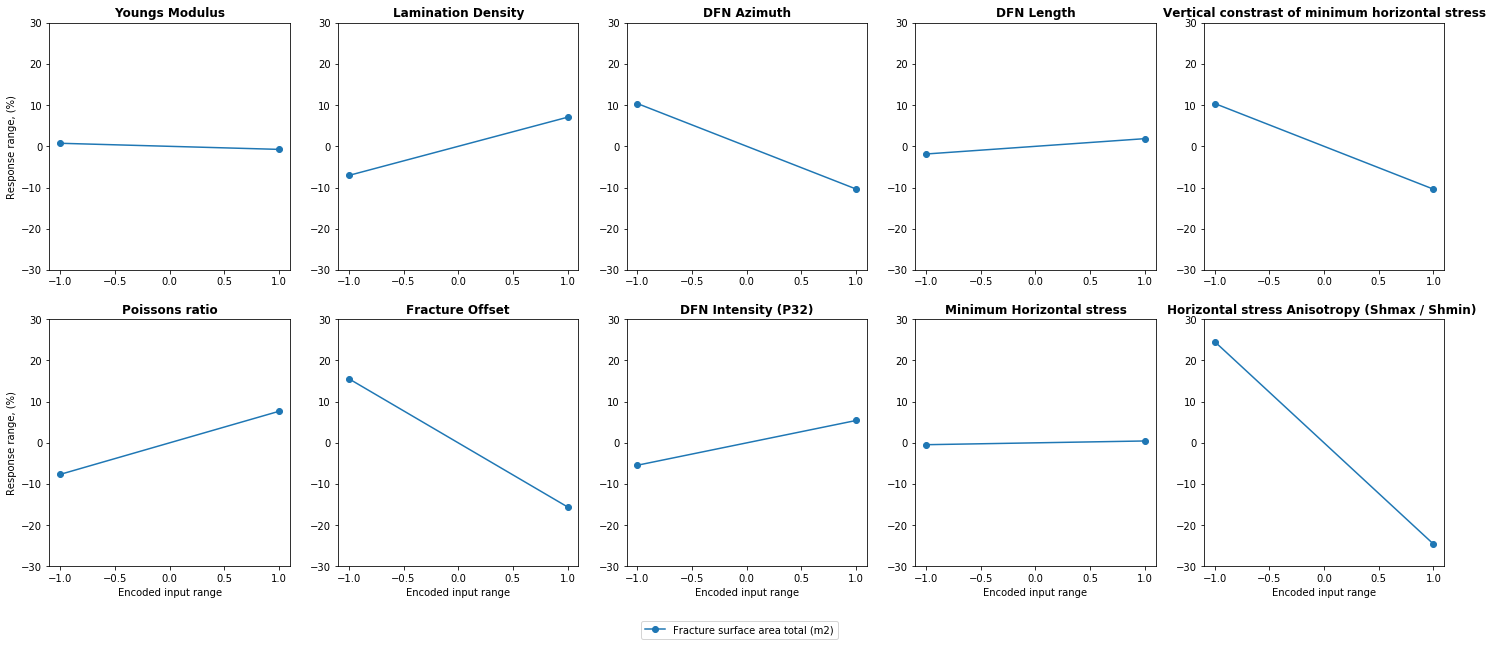

In [30]:

mylist = []
rows=[4]

for i in range(0,5):
    for j in range(0,2):
        mylist.append([j,i])
mylist

#get namee of chosen rows
names = meanDF_high['Measures'].tolist()

plt.close()

f, axarr = plt.subplots(2, 5, figsize=(25,10))

t = 0
# loop over charts of properties
for col in sums: 
    
    #for a given chart, plot the lines for outputs
    for output in rows:
        axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].plot([-1,1],[meanDF_low[col][output], meanDF_high[col][output]] , marker = 'o', label=names[output])
        axarr[([mylist[t][0], mylist[t][1]])[0], ([mylist[t][0], mylist[t][1]])[1]].set_title(col, weight='bold')
        
    
    t+=1
 
    for (m,n), subplot in np.ndenumerate(axarr):
        subplot.set_xlim(-1.1,1.1)
        subplot.set_ylim(-30,30)
        if (n==0):
            #subplot.set_xlabel('Variable range')
            subplot.set_ylabel('Response range, (%)')
        if (m==1):
            subplot.set_xlabel('Encoded input range')
        if (m==1 and n==3):
            subplot.legend(bbox_to_anchor=(-0.3, -0.2))


#plt.tight_layout()
#plt.legend(loc='best')
plt.show()
#plt.savefig('mean-plot-7.png',dpi=500)

[[0, 0],
 [1, 0],
 [0, 1],
 [1, 1],
 [0, 2],
 [1, 2],
 [0, 3],
 [1, 3],
 [0, 4],
 [1, 4]]

In [12]:
tbl = combo.to_latex()

In [19]:
print(combo.to_latex())

\begin{tabular}{lrrrrrrrrrrlrrrrrrrrrrrrrrr}
\toprule
{} &  Youngs Modulus &  Poissons ratio &  Lamination Density &  Fracture Offset &  DFN Azimuth &  DFN Intensity (P32) &  DFN Length &  Minimum Horizontal stress &  Vertical constrast of minimum horizontal stress &  Horizontal stress Anisotropy (Shmax / Shmin)  &    index &  Fracture height average - Fracture 1 (m) &  Fracture height average - Fracture 2 (m) &  Fracture height average - Fracture 3 (m) &  Fracture height average - Fracture 4 (m) &  Fracture surface area total (m2) &  Fracture surface area propped (m2) &  Fracture length - Fracture 1 (m) &  Fracture length - Fracture 2 (m) &  Fracture length - Fracture 3 (m) &  Fracture length - Fracture 4 (m) &  Fracture height max - Fracture 1 (m) &  Fracture height max - Fracture 2 (m) &  Fracture height max - Fracture 3 (m) &  Fracture height max - Fracture 4 (m) &  Total fracture volume (m3) \\
\midrule
0  &              -1 &              -1 &                  -1 &               -

In [22]:
print(df3.to_latex())

\begin{tabular}{llrrrrrrrrrrrrrrr}
\toprule
{} &    index &  Fracture height average - Fracture 1 (m) &  Fracture height average - Fracture 2 (m) &  Fracture height average - Fracture 3 (m) &  Fracture height average - Fracture 4 (m) &  Fracture surface area total (m2) &  Fracture surface area propped (m2) &  Fracture length - Fracture 1 (m) &  Fracture length - Fracture 2 (m) &  Fracture length - Fracture 3 (m) &  Fracture length - Fracture 4 (m) &  Fracture height max - Fracture 1 (m) &  Fracture height max - Fracture 2 (m) &  Fracture height max - Fracture 3 (m) &  Fracture height max - Fracture 4 (m) &  Total fracture volume (m3) \\
\midrule
0  &   CASE 1 &                                 70.660752 &                                 25.897061 &                                 14.711574 &                                  8.435671 &                        -47.764712 &                          -66.803919 &                        -50.036485 &                        -14.629762 &         

In [52]:

#del df3['index']
p = df3.round(2)
p.drop(p.columns[10 : 14], axis=1, inplace=True)
p

,Fracture height average - Fracture 1 (m),Fracture height average - Fracture 2 (m),Fracture height average - Fracture 3 (m),Fracture height average - Fracture 4 (m),Fracture surface area total (m2),Fracture surface area propped (m2),Fracture length - Fracture 1 (m),Fracture length - Fracture 2 (m),Fracture length - Fracture 3 (m),Fracture length - Fracture 4 (m),Total fracture volume (m3)
0,70.66,25.90,14.71,8.44,-47.76,-66.80,-50.04,-14.63,28.29,-30.04,39.45
1,-6.46,4.63,-16.49,-34.31,18.73,60.70,40.34,50.45,41.88,4.44,-14.57
2,-70.17,-46.94,-65.57,-71.67,40.98,85.26,9.35,20.19,116.50,0.51,-38.39
3,-25.89,-12.06,4.87,29.97,7.33,-1.52,-39.44,226.53,55.23,66.23,0.37
4,73.15,-15.96,69.19,67.04,-7.08,-75.20,-12.15,-62.44,-7.71,-58.45,39.14
5,-38.66,-66.45,-40.56,-38.12,54.83,12.30,18.41,-69.54,-4.11,2.39,-30.02
6,-75.17,-68.00,-45.15,-58.01,47.76,66.46,70.96,50.09,-85.39,73.37,-26.81
7,98.93,169.12,120.12,181.48,9.69,-65.51,-48.95,-16.06,31.39,-18.92,-0.31
8,94.45,83.80,-17.79,137.11,-13.15,-7.16,-50.74,36.20,-8.85,-7.02,26.31
9,-66.34,-41.20,11.07,-55.38,-28.79,-27.67,-1.83,-21.75,-51.99,-21.65,12.94


In [53]:
print(p.to_latex())

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  Fracture height average - Fracture 1 (m) &  Fracture height average - Fracture 2 (m) &  Fracture height average - Fracture 3 (m) &  Fracture height average - Fracture 4 (m) &  Fracture surface area total (m2) &  Fracture surface area propped (m2) &  Fracture length - Fracture 1 (m) &  Fracture length - Fracture 2 (m) &  Fracture length - Fracture 3 (m) &  Fracture length - Fracture 4 (m) &  Total fracture volume (m3) \\
\midrule
0  &                                     70.66 &                                     25.90 &                                     14.71 &                                      8.44 &                            -47.76 &                              -66.80 &                            -50.04 &                            -14.63 &                             28.29 &                            -30.04 &                       39.45 \\
1  &                                     -6.46 &                                      4.63 &

In [61]:
xls_file = pd.ExcelFile('SA_res-all2.xlsx')

df_t = xls_file.parse('Sheet1')
df_orig = df_t.transpose()
df_orig = df_orig.reset_index()


del df_orig['index']
p2 = df_orig.round(2)
p2.drop(p2.columns[10 : 14], axis=1, inplace=True)
print(p2.to_latex())

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  Fracture height average - Fracture 1 (m) &  Fracture height average - Fracture 2 (m) &  Fracture height average - Fracture 3 (m) &  Fracture height average - Fracture 4 (m) &  Fracture surface area total (m2) &  Fracture surface area propped (m2) &  Fracture length - Fracture 1 (m) &  Fracture length - Fracture 2 (m) &  Fracture length - Fracture 3 (m) &  Fracture length - Fracture 4 (m) &  Total fracture volume (m3) \\
\midrule
0  &                                    150.93 &                                     96.24 &                                    103.02 &                                     88.57 &                          119732.0 &                             30644.1 &                            175.36 &                            256.20 &                            327.44 &                            360.52 &                     2340.70 \\
1  &                                     82.73 &                                     79.98 &

In [57]:
del df_orig['index']